In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
hsd = pd.read_csv("happiness_score_dataset.csv")
hsd.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
hsd.shape

(158, 12)

In [5]:
hsd.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [6]:
hsd.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [7]:
hsd.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


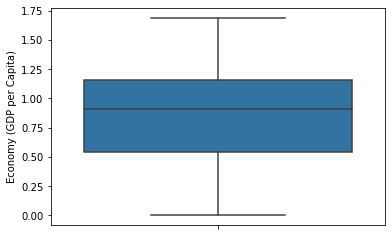

In [8]:
sns.boxplot(hsd['Economy (GDP per Capita)'], orient='v')

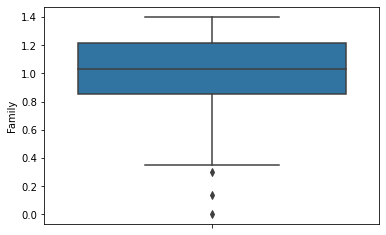

In [9]:
sns.boxplot(hsd['Family'], orient='v')

In [10]:
hsd['Family'].describe()

count    158.000000
mean       0.991046
std        0.272369
min        0.000000
25%        0.856823
50%        1.029510
75%        1.214405
max        1.402230
Name: Family, dtype: float64

In [11]:
from scipy import stats
hsd['familyZ'] = stats.zscore(hsd['Family'], axis=0)
hsd['familyZ'].sample(5)

108   -2.062519
121   -1.425332
24     0.764087
64     0.589210
20     1.084449
Name: familyZ, dtype: float64

In [12]:
hsd1 = hsd[(hsd['familyZ'] <3) & (hsd['familyZ'] >-3)]
hsd.shape[0] - hsd1.shape[0]

2

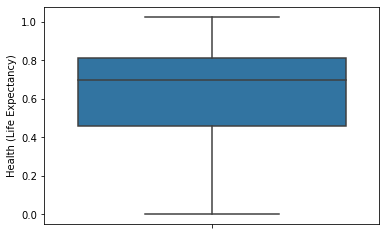

In [14]:
sns.boxplot(hsd1['Health (Life Expectancy)'], orient='v')

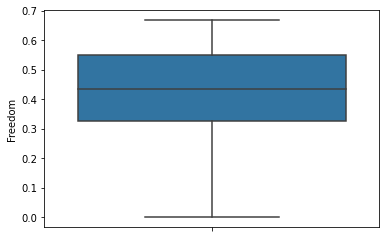

In [15]:
sns.boxplot(hsd1['Freedom'], orient='v')

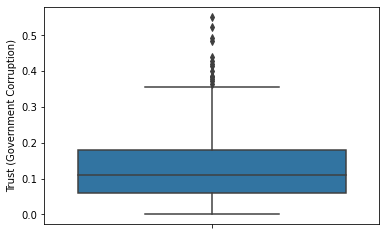

In [16]:
sns.boxplot(hsd1['Trust (Government Corruption)'], orient='v')

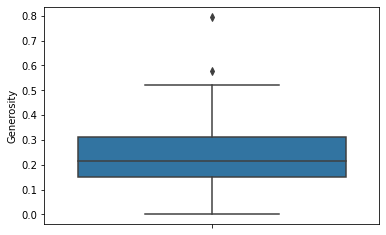

In [17]:
sns.boxplot(hsd1['Generosity'], orient='v')

In [18]:
hsd1['GenerosityZ'] = stats.zscore(hsd1['Generosity'], axis=0)
hsd1['GenerosityZ'].sample(5)

<ipython-input-18-2da07b2e53a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hsd1['GenerosityZ'] = stats.zscore(hsd1['Generosity'], axis=0)


1      1.563901
77     0.272435
143   -0.345535
82    -0.601277
3      0.860474
Name: GenerosityZ, dtype: float64

In [19]:
hsd2 = hsd1[(hsd1['GenerosityZ'] <3) & (hsd1['GenerosityZ'] >-3)]
hsd1.shape[0] - hsd2.shape[0]

1

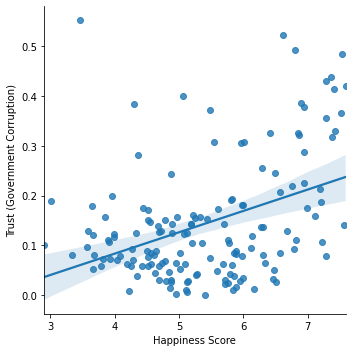

In [20]:
sns.lmplot(x="Happiness Score", y="Trust (Government Corruption)", data=hsd2)

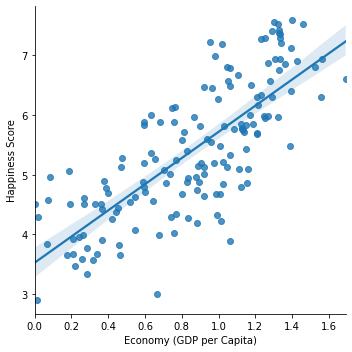

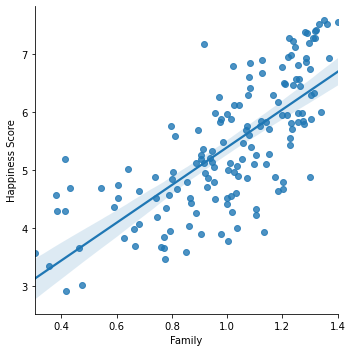

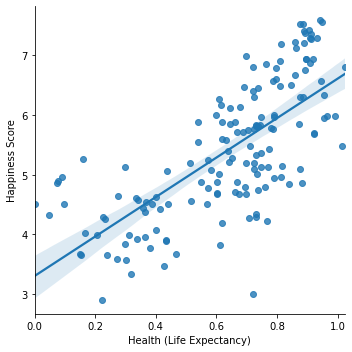

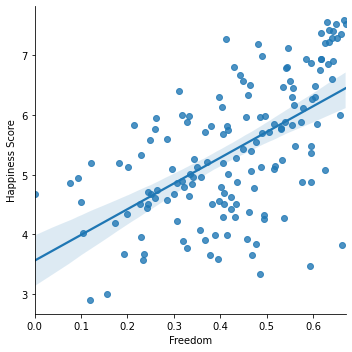

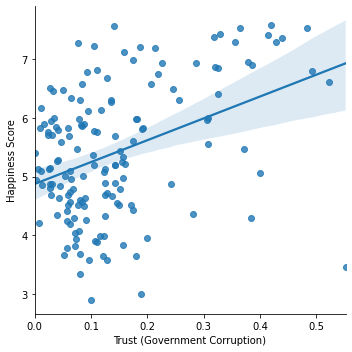

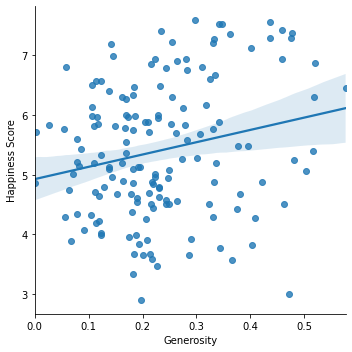

In [21]:
cols=['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity']
sns.lmplot(x=cols[0], y='Happiness Score', data=hsd2)
sns.lmplot(x=cols[1], y='Happiness Score', data=hsd2)
sns.lmplot(x=cols[2], y='Happiness Score', data=hsd2)
sns.lmplot(x=cols[3], y='Happiness Score', data=hsd2)
sns.lmplot(x=cols[4], y='Happiness Score', data=hsd2)
sns.lmplot(x=cols[5], y='Happiness Score', data=hsd2)

In [22]:
hsd2.drop(['Country', 'Region', 'Happiness Rank', 'Standard Error', 'Dystopia Residual'],1, inplace=True)
hsd2.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,familyZ,GenerosityZ
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,1.320281,0.465009
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,1.514458,1.563901
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,1.361054,0.816368
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,1.251922,0.860474
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,1.221204,1.735682


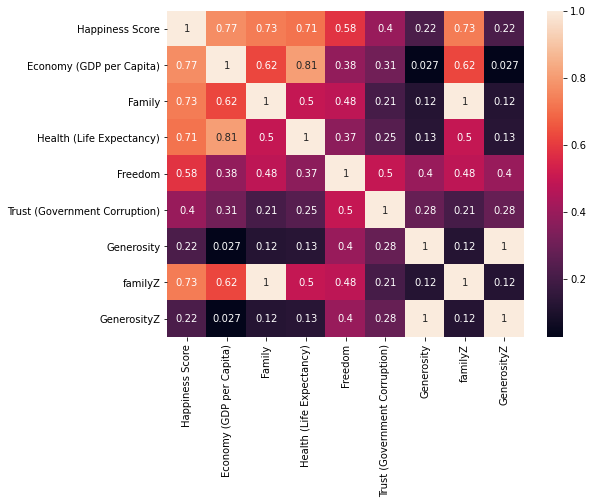

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(hsd2.corr(), annot=True)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

In [27]:
x = hsd2.drop(["Happiness Score"],1)
y = hsd2["Happiness Score"]
print(x.head())
print(y.head())

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.39651  1.34951                   0.94143  0.66557   
1                   1.30232  1.40223                   0.94784  0.62877   
2                   1.32548  1.36058                   0.87464  0.64938   
3                   1.45900  1.33095                   0.88521  0.66973   
4                   1.32629  1.32261                   0.90563  0.63297   

   Trust (Government Corruption)  Generosity   familyZ  GenerosityZ  
0                        0.41978     0.29678  1.320281     0.465009  
1                        0.14145     0.43630  1.514458     1.563901  
2                        0.48357     0.34139  1.361054     0.816368  
3                        0.36503     0.34699  1.251922     0.860474  
4                        0.32957     0.45811  1.221204     1.735682  
0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtype: float64


In [28]:
lm = LinearRegression()
def rstate():
    rscore = []
    for i in range(1,201):
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3, random_state=i)
        lm.fit(x_train, y_train)
        pred = lm.predict(x_test)
        #print(mean_squared_error(y_test, pred))
        #print(np.sqrt(mean_squared_error(y_test, pred)))
        #print(mean_absolute_error(y_test, pred))
        #print(r2_score(y_test, pred))
        rscore.append(r2_score(y_test, pred))
    return rscore.index(max(rscore))+1

In [29]:
print("Best randomstate is:",rstate())

Best randomstate is: 72


In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3, random_state=rstate())

In [36]:
lm.fit(x_train, y_train)
pred = lm.predict(x_test)
print(mean_squared_error(y_test, pred))
print(np.sqrt(mean_squared_error(y_test, pred)))
print(mean_absolute_error(y_test, pred))
print(r2_score(y_test, pred))

0.2793355377945353
0.5285220315129118
0.4064196391829909
0.8493981566459423


In [37]:
import pickle as pk

In [40]:
with open('HS_Pickle', 'wb') as f:
    pk.dump(lm,f)

In [45]:
with open('HS_Pickle', 'rb') as f:
    model = pk.load(f)

In [46]:
pred = model.predict(x_test)
pred

array([5.39809235, 5.11292944, 4.2945449 , 6.68228855, 6.01178004,
       3.88695532, 4.44680501, 6.58288375, 5.08141288, 6.11304751,
       6.92654544, 3.1561761 , 4.20183977, 6.83073182, 4.41014752,
       6.80898932, 3.47059356, 4.70120098, 4.26041814, 4.65668309,
       6.04528071, 6.49034789, 4.13559617, 5.13507927, 5.97300197,
       4.9293743 , 3.73608582, 4.5257747 , 7.07084638, 6.97361093,
       6.10240255, 4.51072349, 6.84673557, 6.06162109, 5.92744523,
       4.44819348, 6.99763823, 5.83355111, 4.37978573, 4.70703923,
       5.76528123, 5.62534792, 6.8616725 , 3.68431497, 4.60875995,
       4.92039411, 5.06445049])